# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from __future__ import division
from math import log10
import numpy.polynomial.polynomial as poly
import statsmodels
import statsmodels.api as sm
import scipy as sp
%matplotlib inline
print 'done'

done


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Mieling, Isabelle

### Part (b): Course Number

AC 209a

### Part (c): Who did you work with?

Nancy Zhang

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [170]:
# assume we are working with numpy arrays 
def multiple_linear_regression_fit(x_train, y_train):
    # Append a column of ones to x
    n = x_train.shape[0]
    one_col = np.ones((n,1))
    
    x_train = np.concatenate((x_train, one_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    x_trans_x = np.dot(x_transpose, x_train)
    l = 0
    try:
        x_trans_x_inv = np.linalg.inv(x_trans_x)
        l = 1
    except:
        pass
    if l == 0:
        x_trans_x_inv = np.linalg.pinv(x_trans_x)
    x_tran_y = np.dot(x_transpose, y_train)
    
    # Compute coefficients: w = inv(x^T * x) x^T * y
    w = np.dot(x_trans_x_inv, x_tran_y)
    
    # obtain intercept : 'c' [last index]
    c = w[-1]
    return w[:-1], c

In [171]:
def multiple_linear_regression_score(w, c, x_test, y_test):
    # Compute predicted y values
    y_predict = np.dot(x_test, w) + c
    
    # Evaluate square error RSS
    sq_error = np.sum(np.square(y_predict - y_test))
    
    # Evaluate squared error for predicting mean  TSS
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_mean - y_test))
    
    # Evaluate R^2 score values
    r_squared = 1 - sq_error / y_variance
    
    return r_squared, y_predict

In [172]:
# Testing
# Load train and test data sets
data_train = np.loadtxt('dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('dataset_1_test.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

# Evaluate model
r_squared, _ = multiple_linear_regression_score(w, c, x_test, y_test)

print('R^2 score on test set:', r_squared)

('R^2 score on test set:', 0.17794462732717164)


**Answer** After creating the functions multiple_linear_regression_fit and multiple_linear_regression_score to fit and check the validity of our linear model, I used the functions to predict automobile prices and then evaluated the R^2 values for the model. The model received an R^2 score of 0.178. This score is far from the ideal value of 1 however, this is most likely to the fact that there are other confounders that are not being taken into account in this model. 

### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

Linear regression with all predictors


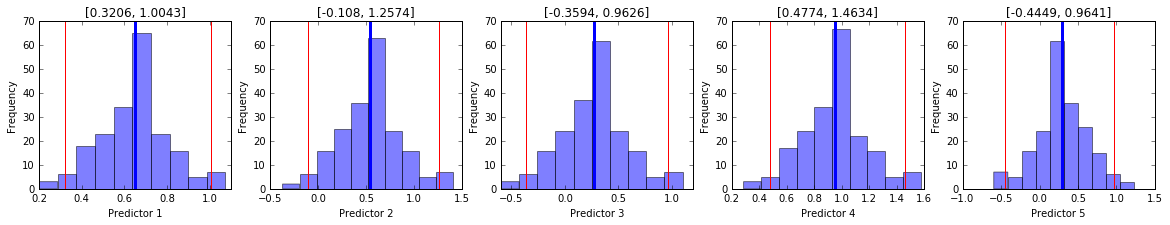

In [173]:
# Load train set
data = np.loadtxt("dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('[' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()


**Answer** 200 random samples of size 100 were made from the data in the dataset. Multiple linear regression models were fit to each subsample and for each predictor variable, a histogram was plotted giving the values obtained across the subsamples for that variable. The confidence intervals for the coefficients are given and shown by the red vertical lines and in the brackets above the histograms. These represent the confidence intervals at a confidene level of 95%. 

The coefficeint values spread from 0.3 to 0.9, -0.03 to 1.1, -0.29 to -82, 0.53 to 1.35, and -0.28 to 0.89. These confidence intervals are quite small. 

In [174]:
print np.percentile(coefs_multiple,2.5)
print np.percentile(coefs_multiple,97.5)

-0.2398918441
1.24563075838


**Answer** The 95% confidence interval for the coefficients is [-0.21 , 1.25], as calculated above. This is similar to some of the confidence intervals found through the simulations. These are the results we would expect to find. 

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

In [175]:
data = np.loadtxt("dataset_3.txt", delimiter=',', skiprows = 1)
#data = pd.read_csv('dataset_3.txt')
x_train = data[:, 0]  # [rows, column]
y_train = data[:, 1]

def polynomial_regression_fit(x_train, y_train, k):
    n = np.size(y_train) # number of rows
    x_poly = np.zeros([n,k]) # numpy array with 0s, shape is n x k (degree)
    
    # now we calculate all the values for x, x^2, ... etc up to x^k
    for d in range(1, k+1): # go 1 past k bc want  x^k & range goes up to but not including
        x_poly[:, d-1] = np.power(x_train, d)  # filling column by column
        # vector x_train to the power d
        
    coef, c = multiple_linear_regression_fit(x_poly, y_train)
    return coef, c

def polynomial_regression_predict(coef, c, k, x_test):
    n = np.size(x_test)
    x_poly = np.zeros([n,k])
    
    for d in range(1, k+1):
        x_poly[:, d-1] = np.power(x_test, d)
        
    y_predict = np.dot(x_poly, coef) + c 
    return y_predict

def polynomial_regression_score(y_predict, y_test): 
    sq_error = np.sum(np.square(y_predict - y_test))
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_mean - y_test))
    
    # Evaluate R^2 score values
    r_squared = 1 - sq_error / y_variance
    return r_squared, y_predict

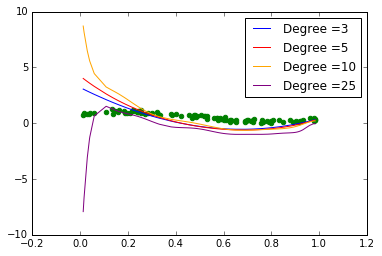

In [176]:
# 3, 5, 10 25
coef3, c3 = polynomial_regression_fit(x_train, y_train, 3)
coef5, c5 = polynomial_regression_fit(x_train, y_train, 5)
coef10, c10 = polynomial_regression_fit(x_train, y_train, 10)
coef25, c25 = polynomial_regression_fit(x_train, y_train, 25)

fit3 = poly.Polynomial(np.append(coef3, c3))
fit5 = poly.Polynomial(np.append(coef5, c5))
fit10 = poly.Polynomial(np.append(coef10, c10))
fit25 = poly.Polynomial(np.append(coef25, c25))

sorted_x = np.asarray(sorted(x_train))
plt.scatter(x_train, y_train, color='green')
plt.plot(sorted_x, fit3(sorted_x), color='blue', label='Degree =3')
plt.plot(sorted_x, fit5(sorted_x), color='red', label='Degree =5')
plt.plot(sorted_x, fit10(sorted_x), color='orange', label='Degree =10')
plt.plot(sorted_x, fit25(sorted_x), color='purple', label='Degree =25')
plt.legend(loc='upper right')

###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

In [177]:
np.random.shuffle(data)
fifty = int(len(data)*(0.5)) 
training, test = data[:fifty,:], data[fifty:,:]

In [178]:
x_train = training[:,0]
y_train = training[:,1]
x_test = test[:,0]
y_test = test[:,1]

plot_twist_test = {} # dictionary of {degree, r^2}
plot_twist_train = {} # dictionary of {degree, r^2}

degrees = [1,3,5,8,10,12,15]
# will get fit and R^2 score for each degree for training and test then plot
for num in degrees:

    # training set 
    coef3, c3 = polynomial_regression_fit(x_train, y_train, num)
    predicted_y = polynomial_regression_predict(coef3, c3, num, x_train)
    are_squared = polynomial_regression_score(predicted_y, y_train)
    plot_twist_train[num] = are_squared[0]
        
    # testing set
    coef4, c4 = polynomial_regression_fit(x_test, y_test, num)
    predicted_y = polynomial_regression_predict(coef4, c4, num, x_test)
    are_squared = polynomial_regression_score(predicted_y, y_test)
    plot_twist_test[num] = are_squared[0]

print "R-Squared Values for Training Set"
print plot_twist_train
print "R-Squared Values for Training Set"
print plot_twist_test


R-Squared Values for Training Set
{1: 0.76029795510911258, 3: 0.94574307184497086, 5: 0.94587765019992887, 8: 0.94781035863199492, 10: 0.95583359784442579, 12: 0.95289703457421127, 15: 0.89028743821699963}
R-Squared Values for Training Set
{1: 0.75526449720821742, 3: 0.90376932811803601, 5: 0.9091676294067681, 8: 0.91413092605596857, 10: 0.91745811849626779, 12: 0.88884867869360529, 15: 0.90828118983948458}


In [179]:
# Individually fit each model to asnwer quesstion 3
coef1, c1 = polynomial_regression_fit(x_train, y_train, 1)
predicted_y1 = polynomial_regression_predict(coef1, c1, 1, x_train)    

coef3, c3 = polynomial_regression_fit(x_train, y_train, 3)
predicted_y3 = polynomial_regression_predict(coef3, c3, 3, x_train)    

coef5, c5 = polynomial_regression_fit(x_train, y_train, 5)
predicted_y5 = polynomial_regression_predict(coef5, c5, 5, x_train)    

coef8, c8 = polynomial_regression_fit(x_train, y_train, 8)
predicted_y8 = polynomial_regression_predict(coef8, c8, 8, x_train)    

coef10, c10 = polynomial_regression_fit(x_train, y_train, 10)
predicted_y10 = polynomial_regression_predict(coef10, c10, 10, x_train)    

coef12, c12 = polynomial_regression_fit(x_train, y_train, 12)
predicted_y12 = polynomial_regression_predict(coef12, c12, 12, x_train)    

coef15, c15 = polynomial_regression_fit(x_train, y_train, 15)
predicted_y15 = polynomial_regression_predict(coef15, c15, 15, x_train)    

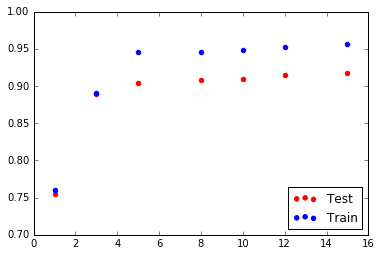

In [180]:
degree_array = np.array(degrees)

r_squared_test = []
r_squared_train = []
for val in degrees:
    r_squared_test.append(plot_twist_test[val])
    r_squared_train.append(plot_twist_train[val])

test_r = np.asarray(sorted(np.array(r_squared_test)))
train_r = np.asarray(sorted(np.array(r_squared_train)))

plt.scatter(degree_array, test_r, color='red', label='Test')
plt.scatter(degree_array, train_r, color='blue', label='Train')
plt.legend(loc='lower right')

**Answer ** As we can see from the graph above, there is a positive relationship between the degree of the polynomial model and the fit on both the training and the testing data. This relationship is expected as we know that when we increase the degree of the polynomial for the model, we increase the fit of the model. 

Based on the plot, the best polynomial would be that would the greatest R-squared value and this corresponds to the degree of 15, which can be seen as the farthest right red and blue data points in the graph. 

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

In [181]:
# y_actual will be y_train
n = len(y_train)

def rss(y_predicted, y_actual): # n x 2 for both
    rss = sum((y_actual - y_predicted)**2)
    return rss

def return_AIC(n, k, rss):
    aic = n*(np.log(rss/n)) + (2*k)
    return aic
    
def return_BIC(n, k, rss):
    bic = n*(np.log(rss/n)) + k*(np.log(n))
    return bic

plot_twist_aic = {} 
plot_twist_bic = {} 

rss1 = rss(predicted_y1, y_train)
aic1 = return_AIC(n, 1, rss1)
bic1 = return_BIC(n, 1, rss1)
plot_twist_aic[1] = aic1
plot_twist_bic[1] = bic1

rss3 = rss(predicted_y3, y_train)
aic3 = return_AIC(n, 3, rss3)
bic3 = return_BIC(n, 3, rss3)
plot_twist_aic[3] = aic3
plot_twist_bic[3] = bic3

rss5 = rss(predicted_y5, y_train)
aic5 = return_AIC(n, 5, rss5)
bic5 = return_BIC(n, 5, rss5)
plot_twist_aic[5] = aic5
plot_twist_bic[5] = bic5

rss8 = rss(predicted_y8, y_train)
aic8 = return_AIC(n, 8, rss1)
bic8 = return_BIC(n, 8, rss1)
plot_twist_aic[8] = aic8
plot_twist_bic[8] = bic8

rss10 = rss(predicted_y10, y_train)
aic10 = return_AIC(n, 10, rss10)
bic10 = return_BIC(n, 10, rss10)
plot_twist_aic[10] = aic10
plot_twist_bic[10] = bic10

rss12 = rss(predicted_y12, y_train)
aic12 = return_AIC(n, 12, rss12)
bic12 = return_BIC(n, 12, rss12)
plot_twist_aic[12] = aic12
plot_twist_bic[12] = bic12

rss15 = rss(predicted_y15, y_train)
aic15 = return_AIC(n, 15, rss15)
bic15 = return_BIC(n, 15, rss15)
plot_twist_aic[15] = aic15
plot_twist_bic[15] = bic15


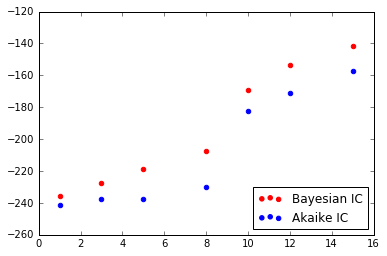

In [182]:
bics = []
aics = []
for val in degrees:
    bics.append(plot_twist_bic[val])
    aics.append(plot_twist_aic[val])

bics_sort = np.asarray(sorted(np.array(bics)))
aics_sort = np.asarray(sorted(np.array(aics)))

plt.scatter(degree_array, bics_sort, color='red', label='Bayesian IC')
plt.scatter(degree_array, aics_sort, color='blue', label='Akaike IC')
plt.legend(loc='lower right')

In [183]:
# Max R-Squared:  
rr = 0
degg =0
for deg, r_sq in plot_twist_train.iteritems():
    if r_sq >= rr:
        rr = r_sq
        degg = deg
    else:
        pass
print rr
print deg


0.955833597844
15


In [184]:
# Min BIC:  
bicc = 100
degg =0
for deg, bic in plot_twist_bic.iteritems():
    if bic <= bicc:
        bicc = bic
        degg = deg
    else:
        pass
print bicc
print deg

-235.518007019
15


In [185]:
# Min AIC:  
aicc = 100
degg =0
for deg, aic in plot_twist_aic.iteritems():
    if aic <= aicc:
        aicc = aic
        degg = deg
    else:
        pass
print aicc
print deg

-241.254076036
15


**Answer ** As we can see above, the maximum R-squared value, minimum BIC value, and minimum AIC value all correspond to the model with degree 15. Using BIC and AIC values, we can suggest which model would give the best fit. This is done by minimizing these values. As seen above, the minumum value for each corresponds to the degree of 15. This matches with the model that yields the maximum test R-squared value, which is degree 15 as calculated above and as seen above in question 2 in the scatterplot in red.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [139]:
df = pd.read_csv('green_tripdata_2015-02.csv')
df.head()

VendorID lpep_pickup_datetime  \
2 2015-01-01 00:34:42  2015-01-01 00:38:34                    N   
  2015-01-01 00:34:46  2015-01-01 00:47:23                    N   
1 2015-01-01 00:34:44  2015-01-01 00:38:15                    N   
2 2015-01-01 00:34:48  2015-01-01 00:38:08                    N   
  2015-01-01 00:34:53  2015-01-01 01:09:10                    N   

                       Lpep_dropoff_datetime  Store_and_fwd_flag  RateCodeID  \
2 2015-01-01 00:34:42                      1          -73.922592   40.754528   
  2015-01-01 00:34:46                      1          -73.952751   40.677711   
1 2015-01-01 00:34:44                      1          -73.843010   40.719055   
2 2015-01-01 00:34:48                      1          -73.860825   40.757793   
  2015-01-01 00:34:53                      1          -73.945183   40.783321   

                       Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
2 2015-01-01 00:34:42        -73.913635        40.765522                  1   
  2015-01-01 00:34:46        -73.981529        40.658978                  1   
1 2015-01-01 00:34:44        -73.846581        40.711567                  1   
2 2015-01-01 00:34:48        -73.854042        40.749821                  1   
  2015-01-01 00:34:53        -73.989624        40.765450                  1   

                       Dropoff_latitude  Passenger_count     ...      \
2 2015-01-01 00:34:42              0.88              5.0     ...       
  2015-01-01 00:34:46              3.08             12.0     ...       
1 2015-01-01 00:34:44              0.90              5.0     ...       
2 2015-01-01 00:34:48              0.85              5.0     ...       
  2015-01-01 00:34:53              4.91             24.5     ...       

                       Fare_amount  Extra  MTA_tax  Tip_amount  Tolls_amount  \
2 2015-01-01 00:34:42          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:46          0.5    0.0      0.0         NaN           0.3   
1 2015-01-01 00:34:44          0.5    1.8      0.0         NaN           0.0   
2 2015-01-01 00:34:48          0.5    0.0      0.0         NaN           0.3   
  2015-01-01 00:34:53          0.5    0.0      0.0         NaN           0.3   

                       Ehail_fee  improvement_surcharge  Total_amount  \
2 2015-01-01 00:34:42        6.3                      2           1.0   
  2015-01-01 00:34:46       13.3                      2           1.0   
1 2015-01-01 00:34:44        7.8                      1           1.0   
2 2015-01-01 00:34:48        6.3                      2           1.0   
  2015-01-01 00:34:53       25.8                      2           1.0   

                       Payment_type  Trip_type   
2 2015-01-01 00:34:42           NaN         NaN  
  2015-01-01 00:34:46           NaN         NaN  
1 2015-01-01 00:34:44           NaN         NaN  
2 2015-01-01 00:34:48           NaN         NaN  
  2015-01-01 00:34:53           NaN         NaN  

[5 rows x 21 columns]

In [159]:
df_mat = df.as_matrix(columns=df.columns[0:])
print df_mata[:,0]

['2015-01-01 00:38:34' '2015-01-01 00:47:23' '2015-01-01 00:38:15' ...,
 '2015-01-31 23:29:48' '2015-01-31 23:29:32' '2015-01-31 23:04:57']


In [186]:
np.random.shuffle(df_mat)
fifty = int(len(df_mat)*(0.5)) 
training, test = df_mat[:fifty,:], df_mat[fifty:,:]

x_train = training[:,0]
y_train = training[:,9]
x_test = test[:,0]
y_test = test[:,9]

print 'time of day' , x_train
print 'Passengers' , y_train

time of day ['2015-01-31 00:52:46' '2015-01-07 11:05:17' '2015-01-26 13:13:25' ...,
 '2015-01-31 23:41:54' '2015-01-08 12:14:10' '2015-01-16 04:25:10']
Passengers [5.0 29.0 7.5 ..., 16.5 9.0 42.5]


In [ ]:
# 3, 5, 10 25
coef3, c3 = polynomial_regression_fit(x_train, y_train, 3)
coef5, c5 = polynomial_regression_fit(x_train, y_train, 5)
coef10, c10 = polynomial_regression_fit(x_train, y_train, 10)
coef25, c25 = polynomial_regression_fit(x_train, y_train, 25)

fit3 = poly.Polynomial(np.append(coef3, c3))
fit5 = poly.Polynomial(np.append(coef5, c5))
fit10 = poly.Polynomial(np.append(coef10, c10))
fit25 = poly.Polynomial(np.append(coef25, c25))

sorted_x = np.asarray(sorted(x_train))
plt.scatter(x_train, y_train, color='green')
plt.plot(sorted_x, fit3(sorted_x), color='blue', label='Degree =3')
plt.plot(sorted_x, fit5(sorted_x), color='red', label='Degree =5')
plt.plot(sorted_x, fit10(sorted_x), color='orange', label='Degree =10')
plt.plot(sorted_x, fit25(sorted_x), color='purple', label='Degree =25')
plt.legend(loc='upper right')

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

** Answer** We could use a similar approach to fit a polynomial model on data sets with more than one predictor by having more than one predictor and calculating the R-squared value for a model and picking the model with the highest R-squared value. Similarly, we could use the BIC and AID methods to determine which model would work the best with our data. 

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?

**__Answer__** Noise in a dataset can result in lower accuracy of our model and data in general. Knowing about noisy datapoints can allow us to adjust for these datapoints, like we might remove outliers and adjust for these points with very high residuals, which are not representative of the majority of the data. 

Though I was not able to get to the challenge problem, based on my current understanding of R-squared values and their use in determining the 'best fit model', the R-squared value will increase with each predictor that is added to the model. In other words, the R-squared term will be greater for a new linear model compared with one fitted using plain linear regression. However, the R-squared value should be interpreted carefully as the highest R-squared value does not always indivate the best model. A model with 10 covariates, including driver age, license plate number, and vehicle color, for example, would not necessarily be the best fit for the data, though it might give rise to the highest R-squared value. Therefore, sometimes it is better to go for a simple model which has an R-squared value which accurately represents the whether the variation in data is due to the covariates. 